# Example 1

### import dependencies

In [2]:
import sys
import os

# Get the root project folder
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

# Add the src folder to sys.path
src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

import yaml
from elec_pinn.data.preprocessing import Preprocessor     
from elec_pinn.data.loader import ScalerLoader     
from elec_pinn.cli import load_config, get_model
from elec_pinn.utils.visualization import plot_pinn_performance 

### Load configurations


In [3]:
cfg = load_config("example1_config.yaml")

### Preprocess data

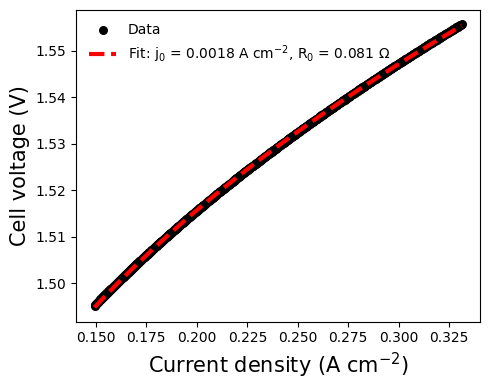

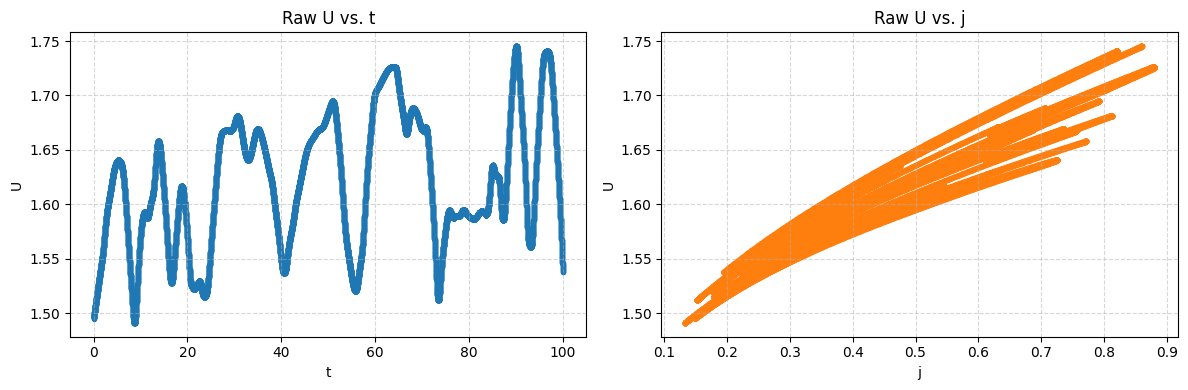

In [4]:
dp = Preprocessor(cfg["data"]["dataset_name"])
df = dp.preprocess(
                    t0 = cfg["data"]["t0"],
                    t1 = cfg["data"]["t1"],
                    plot_fit = True,   # show the performance fit curve
                    plot_raw = True   # show raw data over time
                  )

### Instantiate scaler
ScalerLoader handles scaling of data and converts it to Torch dataloaders that are split into the fractions specified in the .yaml configurations file

In [4]:


scaler = ScalerLoader(
                feature_cols=cfg["data"]["feature_names"],
                target_cols=cfg["data"]["target_names"],
                scale_range=tuple(cfg["data"]["scale_range"]) 
                     ).fit(df)


train_loader, val_loader, test_loader, all_loader = scaler.get_loaders(
    df,
    f_train=cfg["data"]["train_frac"],
    f_val=  cfg["data"]["val_frac"],
    f_test=1 - cfg["data"]["train_frac"] - cfg["data"]["val_frac"],
    batch_sizes=tuple(cfg["training"]["batch_sizes"])
)

### Instantiate PINN and train

In [5]:
model   = get_model(cfg)
training_results = model.train_model( train_loader, 
                                      val_loader,
                                      cfg['training']['epochs'],
                                      cfg['training']['save_freq'],
                                      cfg['training']['patience'])

Epoch 3 | Train: 1.247939, Val: 0.982679:  20%|████████████████████▌                                                                                  | 2/10 [00:00<00:00, 10.49it/s]

Epoch 1: New best model saved! Loss: 1.0141356389
Epoch 2: New best model saved! Loss: 0.9983226061
Epoch 3: New best model saved! Loss: 0.9826789896


Epoch 6 | Train: 1.196768, Val: 0.936765:  60%|█████████████████████████████████████████████████████████████▊                                         | 6/10 [00:00<00:00, 11.43it/s]

Epoch 4: New best model saved! Loss: 0.9671913385
Epoch 5: New best model saved! Loss: 0.9518863360
Epoch 6: New best model saved! Loss: 0.9367654522


Epoch 9 | Train: 1.148569, Val: 0.892523:  80%|██████████████████████████████████████████████████████████████████████████████████▍                    | 8/10 [00:00<00:00, 11.48it/s]

Epoch 7: New best model saved! Loss: 0.9218370120
Epoch 8: New best model saved! Loss: 0.9070826372
Epoch 9: New best model saved! Loss: 0.8925229907


Epoch 10 | Train: 1.134664, Val: 0.878170: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.08it/s]

Epoch 10: New best model saved! Loss: 0.8781700333
Training complete! Best loss: 0.87817003 at epoch 10


In [6]:

result_df = model.evaluate(scaler, df, all_loader, cfg['data']['feature_names'], cfg['data']['target_names'] )


Best model loaded successfully.


Evaluating PINN: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 80.90it/s]


Saved evaluation DataFrame to: plots\pinn_evaluation.csv


In [8]:
plot_pinn_performance( result_df, cfg['data']['feature_names'], cfg['data']['target_names'], cfg['data']['train_frac'], cfg['data']['val_frac'] )

Plots successfully created and saved at: D:\PyCharmProjects\electrolyzer_PINN\examples\example_1
